Here we use symbolic methods to check the eigenvalue calculations in SI Appendix, S6

In [1]:
from sympy import *
init_printing()

In [27]:
lmb = symbols('lambda')
k_ltd, k_ph, k_pe, k_mf, k_cf, k_d, beta_l, w_pc, k_e, g_t, w_h, v, w_e, k_v, sigma_h2 = symbols('k_ltd, k_ph, k_pe, k_mf, k_cf, k_d, beta_l, w_pc, k_e, g_t, w_h, v, w_e, k_v, sigma_h2')


In [4]:
k_l = k_ltd*k_cf*beta_l*k_e*w_pc

# During training

In [6]:
J = sigma_h2/(1-w_pc*k_e*k_pe*w_e)*Matrix([[-k_ph**2*(k_d + k_l), g_t*k_pe*k_ph*(k_d + k_l), k_e*k_ph*k_mf*(k_d*k_pe*w_e + k_ltd*k_cf*beta_l)],
           [g_t*k_ph*k_pe*(k_d + k_l), -g_t**2*k_pe**2*(k_d + k_l), -g_t*k_e*k_mf*k_pe*(k_d*k_pe*w_e + k_ltd*k_cf*beta_l)],
            [-k_v*k_mf*k_ph, g_t*k_v*k_mf*k_pe, k_v*k_mf**2*k_e*k_pe*w_e]
           ])

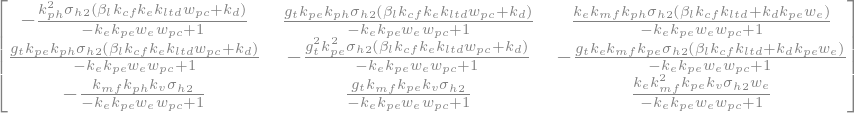

In [7]:
J

In [8]:
p = J.charpoly(lmb)

In [9]:
coeffs = p.all_coeffs()

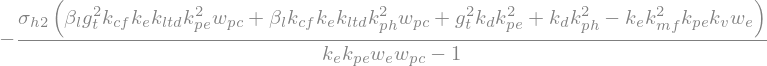

In [11]:
factor(coeffs[1]) # a

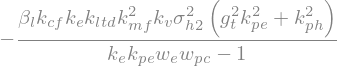

In [12]:
factor(coeffs[2]) # b

# Post-training

In [28]:
g = k_e*(k_mf*v - w_pc*k_ph*w_h)/(1-w_pc*k_e*k_pe*w_e)

In [52]:
dwdt = Matrix([k_d*k_ph**sigma_h2/(1-w_pc*k_e*k_pe*w_e)*(k_e*k_pe*w_e*k_mf*v - k_ph*w_h),
               -k_d*k_pe*sigma_h2/(1-w_pc*k_e*k_pe*w_e)*g*(k_e*k_pe*w_e*k_mf*v - k_ph*w_h),
               k_v*k_mf*sigma_h2/(1-w_pc*k_e*k_pe*w_e)*(k_e*k_pe*w_e*k_mf*v - k_ph*w_h)])

In [53]:
J_dark = dwdt.jacobian(Matrix([w_h, w_e, v])).subs({w_h: k_e*k_pe*w_e*k_mf*v/k_ph})

In [54]:
p_dark = J_dark.charpoly(lmb)

In [55]:
coeffs = p_dark.all_coeffs()

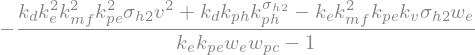

In [56]:
factor(coeffs[1])